In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, text
import psycopg2
import requests
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML

# Getting all the data in 

In [2]:
col = pd.read_csv('..\data\cost_of_living.csv')

In [3]:
col

,COL,state,GroceryCostsIndex,HealthCostsIndex,HousingCostsIndex,MiscCostsIndex,TransportationCostsIndex,UtilityCostsIndex
0,179.0,Hawaii,125.6,118.4,309.7,123.8,140.3,141.1
1,148.7,District of Columbia,106.9,104.7,241.8,117.7,107.9,110.2
2,148.4,Massachusetts,105.0,112.6,219.5,125.8,127.5,126.1
3,134.5,California,112.3,106.4,186.5,110.9,124.1,124.8
4,125.1,New York,103.0,104.5,173.3,109.0,106.7,102.5
5,124.4,Alaska,127.4,149.8,118.1,118.8,121.9,148.1
6,119.5,Maryland,108.5,96.2,152.2,108.5,100.2,109.2
7,115.1,Oregon,107.6,101.4,139.9,105.8,113.6,94.0
8,115.1,Washington,109.7,119.8,129.4,110.8,117.1,92.2
9,115.0,New Hampshire,102.3,120.6,109.8,120.8,113.6,130.2


In [4]:
housing = pd.read_excel('../data/state_housing.xlsx')

In [5]:
housing.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2013-12-01,2013-12-31,30,state,4,8,f,Nevada,NaN,Nevada,...,-0.116680,0.118645,-0.023369,0.058965,0.142403,-0.053666,-0.119723,West Region,NaN,2023-09-24 14:28:29
1,2014-05-01,2014-05-31,30,state,4,8,f,Nevada,NaN,Nevada,...,-0.216249,0.166320,0.011289,0.095195,0.115183,-0.000201,-0.045245,West Region,NaN,2023-09-24 14:28:29
2,2013-06-01,2013-06-30,30,state,4,5,f,Arizona,NaN,Arizona,...,-0.140352,0.123396,0.004000,0.020276,0.329773,0.015044,-0.100010,West Region,NaN,2023-09-24 14:28:29
3,2012-09-01,2012-09-30,30,state,4,12,f,New Jersey,NaN,New Jersey,...,-0.010638,0.012645,0.000618,NaN,0.149371,-0.081861,0.044569,Northeast Region,NaN,2023-09-24 14:28:29
4,2022-08-01,2022-08-31,30,state,4,25,f,Hawaii,NaN,Hawaii,...,0.000000,0.300000,-0.084615,NaN,0.214286,0.214286,0.157143,West Region,NaN,2023-09-24 14:28:29


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
pop_change = pd.read_excel('../data/population_change.xlsx')

In [8]:
pop_change

,table with row headers in column A and column headers in rows 3 through 5. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,.Alabama,5024356,5031362,5049846,5074296,24,24,24,24,24450,0.484173,49940,0.993958
1,.Alaska,733378,732923,734182,733583,48,48,48,48,-599,-0.081587,205,-
2,.Arizona,7151507,7179943,7264877,7359197,14,14,14,14,94320,1.298301,207690,2.904143
3,.Arkansas,3011555,3014195,3028122,3045637,33,33,33,33,17515,0.578411,34082,1.131708
4,.California,39538245,39501653,39142991,39029342,1,1,1,1,-113649,-0.290343,-508903,-1.287116
5,.Colorado,5773733,5784865,5811297,5839926,21,21,21,21,28629,0.492644,66193,1.146451
6,.Connecticut,3605942,3597362,3623355,3626205,29,29,29,29,2850,0.078656,20263,0.561934
7,.Delaware,989957,992114,1004807,1018396,45,45,45,45,13589,1.352399,28439,2.872751
8,.District of Columbia,689546,670868,668791,671803,49,49,49,49,3012,0.450365,-17743,-2.573142
9,.Florida,21538226,21589602,21828069,22244823,3,3,3,3,416754,1.909257,706597,3.280665


In [9]:
pop_change = pop_change.rename(columns={'table with row headers in column A and column headers in rows 3 through 5. (leading dots indicate sub-parts)': 'state', 'Unnamed: 1': 'base pop', 'Unnamed: 2': '2020 pop', 'Unnamed: 3': '2021 pop', 'Unnamed: 4': '2022 pop', 'Unnamed: 5': 'base rank', 'Unnamed: 6': '2020 rank', 'Unnamed: 7': '2021 rank', 'Unnamed: 8': '2022 rank', 'Unnamed: 9': 'change 2021-2022', 'Unnamed: 10': 'percent change 2021-2022', 'Unnamed: 11': 'change 2020-2022', 'Unnamed: 12': 'percent change 2020-2022'})

In [10]:
pop_change

,state,base pop,2020 pop,2021 pop,2022 pop,base rank,2020 rank,2021 rank,2022 rank,change 2021-2022,percent change 2021-2022,change 2020-2022,percent change 2020-2022
0,.Alabama,5024356,5031362,5049846,5074296,24,24,24,24,24450,0.484173,49940,0.993958
1,.Alaska,733378,732923,734182,733583,48,48,48,48,-599,-0.081587,205,-
2,.Arizona,7151507,7179943,7264877,7359197,14,14,14,14,94320,1.298301,207690,2.904143
3,.Arkansas,3011555,3014195,3028122,3045637,33,33,33,33,17515,0.578411,34082,1.131708
4,.California,39538245,39501653,39142991,39029342,1,1,1,1,-113649,-0.290343,-508903,-1.287116
5,.Colorado,5773733,5784865,5811297,5839926,21,21,21,21,28629,0.492644,66193,1.146451
6,.Connecticut,3605942,3597362,3623355,3626205,29,29,29,29,2850,0.078656,20263,0.561934
7,.Delaware,989957,992114,1004807,1018396,45,45,45,45,13589,1.352399,28439,2.872751
8,.District of Columbia,689546,670868,668791,671803,49,49,49,49,3012,0.450365,-17743,-2.573142
9,.Florida,21538226,21589602,21828069,22244823,3,3,3,3,416754,1.909257,706597,3.280665


# Cleaning and original analysis

In [11]:
housing['property_type'].value_counts()

Single Family Residential    6901
All Residential              6901
Condo/Co-op                  6738
Multi-Family (2-4 Unit)      6642
Townhouse                    6321
Name: property_type, dtype: int64

In [12]:
housing = housing[(housing['property_type']=='All Residential')]

In [13]:
housing.head(10)

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
6,2023-08-01,2023-08-31,30,state,4,12,f,New Jersey,NaN,New Jersey,NJ,All Residential,-1,514800,0.029994,0.107608,484000.0,-0.018733,0.094311,296.0,0.005449,0.088269,290.0,-0.020107,0.072759,8856,0.100534,-0.215033,7338.0,0.025720,-0.241707,8829.0,-0.011863,-0.179690,17012.0,-0.014711,-0.350960,1.9,-0.2,-0.4,31.0,0.0,-5.0,1.030037,-0.002541,0.008933,0.594512,-0.018263,0.023248,0.156654,0.017247,-0.021058,0.355297,0.013949,0.116071,Northeast Region,NaN,2023-09-24 14:28:29
12,2012-04-01,2012-04-30,30,state,4,16,f,New York,NaN,New York,NY,All Residential,-1,189700,-0.013184,-0.015239,237600.0,-0.035313,0.005953,126.0,-0.026558,-0.003425,144.0,-0.017608,0.012664,4619,0.029418,0.068224,2700.0,0.290014,0.155327,11246.0,0.054280,-0.024885,54965.0,0.041339,0.078337,11.9,0.1,0.1,161.0,-1.0,19.0,0.939971,0.001930,-0.000638,0.119290,0.001839,0.009669,0.058801,-0.002033,-0.013513,0.130915,-0.007919,0.026819,Northeast Region,NaN,2023-09-24 14:28:29
15,2019-10-01,2019-10-31,30,state,4,41,f,Maine,NaN,Maine,ME,All Residential,-1,225700,-0.030415,0.038329,237800.0,-0.005410,0.043639,145.0,-0.015421,0.023542,148.0,-0.007875,0.039854,2042,-0.000489,0.025100,1384.0,-0.132288,-0.074866,1818.0,-0.148478,-0.119613,7033.0,-0.070201,-0.102934,3.4,-0.3,-0.5,39.0,7.0,-4.0,0.968373,-0.000986,0.002582,0.217434,-0.014578,0.023157,0.249254,-0.018330,-0.009930,0.383391,-0.024659,0.050095,Northeast Region,NaN,2023-09-24 14:28:29
16,2014-03-01,2014-03-31,30,state,4,35,f,Kansas,NaN,Kansas,KS,All Residential,-1,144100,0.035344,-0.047570,169300.0,0.017321,0.048306,78.0,0.030342,0.039748,85.0,0.006092,0.037375,1623,0.197786,-0.126480,386.0,0.072222,-0.112644,3011.0,0.495777,0.062831,5166.0,0.076699,-0.061239,3.2,-0.3,0.2,105.0,-1.0,0.0,0.967001,0.014843,0.003870,0.135638,0.026654,0.003733,NaN,NaN,NaN,0.058877,-0.015035,0.015286,Midwest Region,NaN,2023-09-24 14:28:29
21,2022-12-01,2022-12-31,30,state,4,15,f,Delaware,NaN,Delaware,DE,All Residential,-1,308700,-0.038267,0.059254,309700.0,0.032669,0.096999,175.0,-0.008434,0.096166,172.0,-0.027640,0.060568,636,-0.021538,-0.420237,530.0,-0.032847,-0.226277,422.0,-0.326954,-0.346749,1019.0,-0.186102,-0.010680,1.6,-0.3,0.7,33.0,5.0,14.0,0.990849,-0.002896,-0.009601,0.300314,-0.010455,-0.086194,0.237488,-0.069222,0.053022,0.337000,-0.057162,-0.119943,South Region,NaN,2023-09-24 14:28:29
23,2012-05-01,2012-05-31,30,state,4,35,f,Kansas,NaN,Kansas,KS,All Residential,-1,148900,0.029369,0.050604,148900.0,-0.064791,-0.009117,74.0,0.018026,0.038396,79.0,0.006821,0.003043,2200,0.208791,0.220866,564.0,0.320843,0.250554,2893.0,-0.049606,0.073469,5956.0,0.011549,0.032057,2.7,-0.5,-0.5,94.0,-10.0,-14.0,0.959738,-0.021587,0.003625,0.120332,0.011263,0.000379,NaN,NaN,NaN,0.034768,-0.010323,-0.018467,Midwest Region,NaN,2023-09-24 14:28:29
35,2013-10-01,2013-10-31,30,state,4,35,f,Kansas,NaN,Kansas,KS,All Residential,-1,159500,0.033235,0.080288,153700.0,0.014244,0.055121,76.0,-0.026124,0.056863,80.0,-0.017030,0.064657,1958,-0.075543,0.063552,565.0,-0.034188,0.046296,2427.0,0.018892,0.056136,5522

In [14]:
housing['period_begin'] = pd.to_datetime(housing['period_begin'])

In [15]:
housing['year'] = housing['period_begin'].dt.year

In [16]:
housing.head(10)

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,year
6,2023-08-01,2023-08-31,30,state,4,12,f,New Jersey,NaN,New Jersey,NJ,All Residential,-1,514800,0.029994,0.107608,484000.0,-0.018733,0.094311,296.0,0.005449,0.088269,290.0,-0.020107,0.072759,8856,0.100534,-0.215033,7338.0,0.025720,-0.241707,8829.0,-0.011863,-0.179690,17012.0,-0.014711,-0.350960,1.9,-0.2,-0.4,31.0,0.0,-5.0,1.030037,-0.002541,0.008933,0.594512,-0.018263,0.023248,0.156654,0.017247,-0.021058,0.355297,0.013949,0.116071,Northeast Region,NaN,2023-09-24 14:28:29,2023
12,2012-04-01,2012-04-30,30,state,4,16,f,New York,NaN,New York,NY,All Residential,-1,189700,-0.013184,-0.015239,237600.0,-0.035313,0.005953,126.0,-0.026558,-0.003425,144.0,-0.017608,0.012664,4619,0.029418,0.068224,2700.0,0.290014,0.155327,11246.0,0.054280,-0.024885,54965.0,0.041339,0.078337,11.9,0.1,0.1,161.0,-1.0,19.0,0.939971,0.001930,-0.000638,0.119290,0.001839,0.009669,0.058801,-0.002033,-0.013513,0.130915,-0.007919,0.026819,Northeast Region,NaN,2023-09-24 14:28:29,2012
15,2019-10-01,2019-10-31,30,state,4,41,f,Maine,NaN,Maine,ME,All Residential,-1,225700,-0.030415,0.038329,237800.0,-0.005410,0.043639,145.0,-0.015421,0.023542,148.0,-0.007875,0.039854,2042,-0.000489,0.025100,1384.0,-0.132288,-0.074866,1818.0,-0.148478,-0.119613,7033.0,-0.070201,-0.102934,3.4,-0.3,-0.5,39.0,7.0,-4.0,0.968373,-0.000986,0.002582,0.217434,-0.014578,0.023157,0.249254,-0.018330,-0.009930,0.383391,-0.024659,0.050095,Northeast Region,NaN,2023-09-24 14:28:29,2019
16,2014-03-01,2014-03-31,30,state,4,35,f,Kansas,NaN,Kansas,KS,All Residential,-1,144100,0.035344,-0.047570,169300.0,0.017321,0.048306,78.0,0.030342,0.039748,85.0,0.006092,0.037375,1623,0.197786,-0.126480,386.0,0.072222,-0.112644,3011.0,0.495777,0.062831,5166.0,0.076699,-0.061239,3.2,-0.3,0.2,105.0,-1.0,0.0,0.967001,0.014843,0.003870,0.135638,0.026654,0.003733,NaN,NaN,NaN,0.058877,-0.015035,0.015286,Midwest Region,NaN,2023-09-24 14:28:29,2014
21,2022-12-01,2022-12-31,30,state,4,15,f,Delaware,NaN,Delaware,DE,All Residential,-1,308700,-0.038267,0.059254,309700.0,0.032669,0.096999,175.0,-0.008434,0.096166,172.0,-0.027640,0.060568,636,-0.021538,-0.420237,530.0,-0.032847,-0.226277,422.0,-0.326954,-0.346749,1019.0,-0.186102,-0.010680,1.6,-0.3,0.7,33.0,5.0,14.0,0.990849,-0.002896,-0.009601,0.300314,-0.010455,-0.086194,0.237488,-0.069222,0.053022,0.337000,-0.057162,-0.119943,South Region,NaN,2023-09-24 14:28:29,2022
23,2012-05-01,2012-05-31,30,state,4,35,f,Kansas,NaN,Kansas,KS,All Residential,-1,148900,0.029369,0.050604,148900.0,-0.064791,-0.009117,74.0,0.018026,0.038396,79.0,0.006821,0.003043,2200,0.208791,0.220866,564.0,0.320843,0.250554,2893.0,-0.049606,0.073469,5956.0,0.011549,0.032057,2.7,-0.5,-0.5,94.0,-10.0,-14.0,0.959738,-0.021587,0.003625,0.120332,0.011263,0.000379,NaN,NaN,NaN,0.034768,-0.010323,-0.018467,Midwest Region,NaN,2023-09-24 14:28:29,2012
35,2013-10-01,2013-10-31,30,state,4,35,f,Kansas,NaN,Kansas,KS,All Residential,-1,159500,0.033235,0.080288,153700.0,0.014244,0.055121,76.0,-0.026124,0.056863,80.0,-0.017030,0.064657,1958,-0.075543,0.063552,565.0,-0.034188,0.0

In [17]:
housing_2020 = housing[housing['period_begin']=='2020-01-01']

In [18]:
housing_2021 = housing[housing['period_begin']=='2021-01-01']

In [19]:
housing_2022 = housing[housing['period_begin']=='2022-01-01']

In [20]:
housing_2020

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,year
338,2020-01-01,2020-01-31,30,state,4,7,f,Arkansas,NaN,Arkansas,AR,All Residential,-1,168700,-0.034356,0.047516,178600.0,0.059175,0.056448,96.0,-0.001121,0.053388,102.0,0.017063,0.040225,2131,-0.155705,0.266191,1350.0,-0.154135,0.239669,3132.0,0.518914,0.089391,9717.0,0.049012,-0.050982,4.6,0.9,-1.5,85.0,9.0,-5.0,0.967451,-0.002163,0.002159,0.112623,-0.003066,0.002700,0.076361,0.015366,-0.012124,0.217438,0.069907,-0.012434,South Region,NaN,2023-09-24 14:28:29,2020
668,2020-01-01,2020-01-31,30,state,4,2,f,Missouri,NaN,Missouri,MO,All Residential,-1,171700,-0.055231,0.015703,180500.0,0.092928,0.063628,101.0,-0.039359,0.042650,172.0,0.696397,0.692742,4803,-0.278937,0.103377,1098.0,-0.209503,0.149738,6060.0,0.519559,-0.001812,13365.0,-0.004173,-0.054742,2.8,0.8,-0.4,68.0,16.0,-1.0,0.957812,-0.000144,-0.002659,0.128348,-0.009764,0.012098,0.123158,0.016459,-0.005069,0.284865,0.094788,0.083952,Midwest Region,NaN,2023-09-24 14:28:29,2020
845,2020-01-01,2020-01-31,30,state,4,34,f,Tennessee,NaN,Tennessee,TN,All Residential,-1,240600,-0.048890,0.079553,256900.0,0.045011,0.051978,130.0,-0.018840,0.086675,137.0,0.027098,0.055538,6310,-0.205089,0.180763,4530.0,-0.122773,0.201910,8111.0,0.512118,0.005579,23491.0,0.015783,-0.043253,3.7,0.8,-0.9,73.0,11.0,-2.0,0.975691,-0.002959,0.005223,0.157845,-0.016003,0.015442,0.122387,0.027689,-0.018166,0.236203,0.079686,-0.004834,South Region,NaN,2023-09-24 14:28:29,2020
1053,2020-01-01,2020-01-31,30,state,4,24,f,Oregon,NaN,Oregon,OR,All Residential,-1,359900,0.000358,0.067811,377200.0,0.061435,0.058725,210.0,-0.005195,0.048501,218.0,0.034038,0.045387,3666,-0.230479,0.125576,2816.0,0.080169,0.033394,4190.0,0.748748,-0.040970,10020.0,-0.038480,-0.125960,2.7,0.5,-0.8,65.0,10.0,-4.0,0.985997,-0.000735,0.004129,0.241680,-0.000553,0.032899,0.154691,0.021882,-0.041314,0.451805,0.164632,0.085350,West Region,NaN,2023-09-24 14:28:29,2020
1379,2020-01-01,2020-01-31,30,state,4,49,f,Minnesota,NaN,Minnesota,MN,All Residential,-1,253000,-0.018312,0.043058,283000.0,0.098077,0.025441,137.0,-0.011418,0.035408,146.0,0.048387,0.057470,3971,-0.306618,0.092435,3204.0,-0.102772,0.017789,4674.0,0.658623,-0.009536,11891.0,-0.033095,-0.078503,3.0,0.9,-0.5,55.0,11.0,-3.0,0.981865,-0.003077,-0.000465,0.240494,-0.034345,0.000879,0.155748,0.023694,0.016411,0.379408,0.153236,0.025009,Midwest Region,NaN,2023-09-24 14:28:29,2020
3087,2020-01-01,2020-01-31,30,state,4,33,f,Iowa,NaN,Iowa,IA,All Residential,-1,167200,-0.031630,0.018478,189800.0,0.091642,0.019648,117.0,0.006022,0.031689,128.0,0.040699,0.040043,1960,-0.286754,0.322537,1203.0,-0.239089,0.192270,2688.0,0.529010,0.209721,10250.0,0.030772,0.184287,5.2,1.6,-0.6,85.0,14.0,-2.0,0.967436,-0.001721,0.007150,0.155102,-0.005742,0.010703,0.055805,0.008138,-0.006702,0.191932,0.022010,-0.025543,Midwest Region,NaN,2023-09-24 14:28:29,2020
3294,2020-01-01,2020-01-31,30,state,4,15,f,Delaware,NaN,Delaware,DE,All Residential,-1,227900,-0.034363,0.030654,245900.0,0.071761,0.063062,127.0,0.004506,0.026256,133.0,0.033207,0.046039,608,-0.258537,

In [21]:
housing_2021

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,year
407,2021-01-01,2021-01-31,30,state,4,35,f,Kansas,NaN,Kansas,KS,All Residential,-1,216700,-0.004907,0.117479,229000.0,0.083651,0.132968,110.0,-0.013110,0.137127,116.0,0.046765,0.152213,2349,-0.291403,0.208955,1037.0,-0.295995,0.332905,2689.0,0.255369,-0.007749,4340.0,0.012835,-0.222779,1.8,0.5,-1.1,50.0,6.0,-14.0,0.989321,0.017826,0.018343,0.143057,0.008811,0.050092,0.003687,-0.000514,0.001359,0.278140,0.040981,0.065006,Midwest Region,NaN,2023-09-24 14:28:29,2021
1333,2021-01-01,2021-01-31,30,state,4,30,f,South Carolina,NaN,South Carolina,SC,All Residential,-1,282700,0.004837,0.146810,293500.0,0.035707,0.102154,150.0,0.010823,0.113353,159.0,0.043517,0.108419,5844,-0.265645,0.283549,3822.0,-0.122388,0.626383,6861.0,0.283149,-0.025703,19461.0,-0.014284,-0.225587,3.3,0.8,-2.2,77.0,4.0,-17.0,0.983177,-0.000161,0.010836,0.203285,0.004617,0.074140,0.107805,0.034666,-0.023034,0.215415,0.090320,0.034268,South Region,NaN,2023-09-24 14:28:29,2021
2453,2021-01-01,2021-01-31,30,state,4,20,f,North Dakota,NaN,North Dakota,ND,All Residential,-1,236000,-0.044087,-0.018385,269400.0,0.157148,0.092587,115.0,-0.028138,-0.007734,124.0,0.010424,0.084778,186,-0.448071,-0.005348,68.0,-0.537415,-0.068493,242.0,0.668966,0.130841,1012.0,0.049793,0.000989,5.4,2.5,0.0,124.0,-80.0,2.0,0.974667,-0.015338,-0.001238,0.150538,-0.015634,0.000805,NaN,NaN,NaN,0.023613,-0.017909,-0.022337,Midwest Region,NaN,2023-09-24 14:28:29,2021
4407,2021-01-01,2021-01-31,30,state,4,2,f,Missouri,NaN,Missouri,MO,All Residential,-1,198100,-0.016922,0.155751,203900.0,0.069983,0.131464,116.0,0.001727,0.121848,122.0,0.049637,-0.291559,5827,-0.310659,0.206918,1601.0,-0.247650,0.448869,5847.0,0.133799,-0.040846,9245.0,-0.065879,-0.316148,1.6,0.4,-1.2,42.0,7.0,-27.0,1.000777,0.022213,0.043004,0.206497,-0.016581,0.078761,0.100162,-0.001182,-0.021222,0.377183,0.082222,0.094657,Midwest Region,NaN,2023-09-24 14:28:29,2021
4466,2021-01-01,2021-01-31,30,state,4,41,f,Maine,NaN,Maine,ME,All Residential,-1,262000,-0.034670,0.142915,256800.0,-0.015560,0.080586,163.0,0.009166,0.176177,164.0,-0.042383,0.052844,1434,-0.348182,0.186104,1025.0,-0.026591,0.400273,1105.0,0.155858,-0.008079,2681.0,-0.136832,-0.470786,1.9,0.5,-2.3,32.0,8.0,-25.0,0.983761,-0.009147,0.017975,0.323570,-0.048248,0.113479,0.130921,-0.000437,-0.007452,0.540555,0.092416,0.094983,Northeast Region,NaN,2023-09-24 14:28:29,2021
4946,2021-01-01,2021-01-31,30,state,4,19,f,Florida,NaN,Florida,FL,All Residential,-1,304200,0.003567,0.176246,316500.0,0.012657,0.082638,184.0,0.010451,0.145151,196.0,0.021063,0.104222,31993,-0.273662,0.214017,32589.0,0.096165,0.370956,43155.0,0.261326,-0.090286,89702.0,-0.041860,-0.320388,2.8,0.7,-2.2,47.0,3.0,-18.0,0.974089,0.000012,0.008563,0.154471,-0.001249,0.050233,0.148982,0.017751,-0.060647,0.397544,0.052589,0.074982,South Region,NaN,2023-09-24 14:28:29,2021
5006,2021-01-01,2021-01-31,30,state,4,43,f,Maryland,NaN,Maryland,MD,All Residential,-1,335200,-0.021477,0.154112,342300.0,0.034131,0.104582,180.0,-0.001742,0.153894,186.0,0.021502,0.131498,6133,

In [22]:
housing_2022

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,year
115,2022-01-01,2022-01-31,30,state,4,29,f,Illinois,NaN,Illinois,IL,All Residential,-1,243500,-0.010823,0.050107,269300.0,0.185127,0.027459,152.0,-0.005431,0.096668,166.0,0.140674,0.031926,10860,-0.307530,0.041927,5175.0,-0.405719,-0.440238,12280.0,0.435082,-0.017207,29044.0,0.158655,0.070470,2.7,1.1,0.1,38.0,7.0,-12.0,0.980000,-0.003181,0.005549,0.284807,-0.022086,0.055410,0.096612,-0.023905,-0.046577,0.407706,0.066391,-0.065388,Midwest Region,NaN,2023-09-24 14:28:29,2022
424,2022-01-01,2022-01-31,30,state,4,14,f,New Mexico,NaN,New Mexico,NM,All Residential,-1,299700,-0.105523,0.113292,308300.0,-0.029257,0.147106,172.0,-0.049779,0.144669,179.0,-0.019382,0.129855,913,-0.129647,0.120245,591.0,-0.198100,0.170297,949.0,0.226098,-0.062253,3429.0,-0.033268,-0.107031,3.8,0.4,-0.9,77.0,7.0,-6.0,0.992195,-0.004512,0.009209,0.089814,-0.017908,0.034599,0.017206,0.001136,0.004967,0.119148,0.003204,0.018543,West Region,NaN,2023-09-24 14:28:29,2022
827,2022-01-01,2022-01-31,30,state,4,49,f,Minnesota,NaN,Minnesota,MN,All Residential,-1,304000,-0.014834,0.102921,323600.0,0.030774,0.078159,167.0,-0.008552,0.100530,176.0,0.037278,0.097654,4247,-0.388833,-0.088822,3633.0,-0.096493,-0.087644,4109.0,0.329343,-0.101662,6142.0,-0.085468,-0.127557,1.4,0.4,-0.1,31.0,6.0,-2.0,1.001897,0.000104,0.004328,0.404050,-0.010542,0.003492,0.123413,-0.043502,-0.025167,0.511244,0.154543,0.010398,Midwest Region,NaN,2023-09-24 14:28:29,2022
1006,2022-01-01,2022-01-31,30,state,4,28,f,Rhode Island,NaN,Rhode Island,RI,All Residential,-1,381700,-0.025134,0.147367,399100.0,0.058002,0.180540,214.0,-0.000541,0.132545,229.0,0.034882,0.179581,1123,-0.283801,0.056444,942.0,-0.148282,-0.041709,935.0,0.133333,-0.200171,1308.0,-0.155039,-0.359765,1.2,0.2,-0.7,34.0,2.0,-7.0,1.007865,-0.004379,0.004607,0.509350,-0.025727,0.029576,0.110092,0.000273,0.017581,0.449757,0.130422,0.089869,Northeast Region,NaN,2023-09-24 14:28:29,2022
1740,2022-01-01,2022-01-31,30,state,4,9,f,California,NaN,California,CA,All Residential,-1,715300,-0.026867,0.127287,744100.0,0.087893,0.111857,466.0,-0.019932,0.141248,473.0,0.093027,0.127324,25175,-0.282620,-0.090203,23558.0,-0.095454,-0.085552,29835.0,0.468908,-0.061054,36264.0,0.040873,-0.237126,1.4,0.4,-0.3,30.0,2.0,-4.0,1.023673,-0.001165,0.015135,0.571003,-0.009141,0.083706,0.095191,-0.028518,-0.037971,0.487104,0.118758,0.048211,West Region,NaN,2023-09-24 14:28:29,2022
2088,2022-01-01,2022-01-31,30,state,4,26,f,Pennsylvania,NaN,Pennsylvania,PA,All Residential,-1,243400,-0.021786,0.074876,252800.0,0.066802,0.057737,154.0,-0.000707,0.119169,160.0,0.071464,0.102049,10432,-0.284548,-0.002295,8306.0,-0.141587,0.019266,9701.0,0.176164,-0.065864,20952.0,-0.070288,-0.105838,2.0,0.5,-0.2,41.0,4.0,-6.0,0.989149,-0.002508,0.006737,0.334452,-0.019296,0.059299,0.139414,0.010420,-0.001718,0.387087,0.069079,0.011570,Northeast Region,NaN,2023-09-24 14:28:29,2022
2940,2022-01-01,2022-01-31,30,state,4,42,f,Virginia,NaN,Virginia,VA,All Residential,-1,358100,-0.043211,0.069285,374600.0,0.049750,0.071305,199.0,-0.02330

In [23]:
pop_change['state'] = pop_change['state'].str.replace('[^\w\s]','')

C:\Users\camer\AppData\Local\Temp\ipykernel_7152\2662854400.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  pop_change['state'] = pop_change['state'].str.replace('[^\w\s]','')


In [24]:
pop_change

,state,base pop,2020 pop,2021 pop,2022 pop,base rank,2020 rank,2021 rank,2022 rank,change 2021-2022,percent change 2021-2022,change 2020-2022,percent change 2020-2022
0,Alabama,5024356,5031362,5049846,5074296,24,24,24,24,24450,0.484173,49940,0.993958
1,Alaska,733378,732923,734182,733583,48,48,48,48,-599,-0.081587,205,-
2,Arizona,7151507,7179943,7264877,7359197,14,14,14,14,94320,1.298301,207690,2.904143
3,Arkansas,3011555,3014195,3028122,3045637,33,33,33,33,17515,0.578411,34082,1.131708
4,California,39538245,39501653,39142991,39029342,1,1,1,1,-113649,-0.290343,-508903,-1.287116
5,Colorado,5773733,5784865,5811297,5839926,21,21,21,21,28629,0.492644,66193,1.146451
6,Connecticut,3605942,3597362,3623355,3626205,29,29,29,29,2850,0.078656,20263,0.561934
7,Delaware,989957,992114,1004807,1018396,45,45,45,45,13589,1.352399,28439,2.872751
8,District of Columbia,689546,670868,668791,671803,49,49,49,49,3012,0.450365,-17743,-2.573142
9,Florida,21538226,21589602,21828069,22244823,3,3,3,3,416754,1.909257,706597,3.280665


In [25]:
housing_20_22 = housing_2020.append(housing_2021)

C:\Users\camer\AppData\Local\Temp\ipykernel_7152\2124307212.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  housing_20_22 = housing_2020.append(housing_2021)


In [26]:
housing_20_22 = housing_20_22.append(housing_2022)

C:\Users\camer\AppData\Local\Temp\ipykernel_7152\1020675945.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  housing_20_22 = housing_20_22.append(housing_2022)


In [27]:
housing_20_22

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,year
338,2020-01-01,2020-01-31,30,state,4,7,f,Arkansas,NaN,Arkansas,AR,All Residential,-1,168700,-0.034356,0.047516,178600.0,0.059175,0.056448,96.0,-0.001121,0.053388,102.0,0.017063,0.040225,2131,-0.155705,0.266191,1350.0,-0.154135,0.239669,3132.0,0.518914,0.089391,9717.0,0.049012,-0.050982,4.6,0.9,-1.5,85.0,9.0,-5.0,0.967451,-0.002163,0.002159,0.112623,-0.003066,0.002700,0.076361,0.015366,-0.012124,0.217438,0.069907,-0.012434,South Region,NaN,2023-09-24 14:28:29,2020
668,2020-01-01,2020-01-31,30,state,4,2,f,Missouri,NaN,Missouri,MO,All Residential,-1,171700,-0.055231,0.015703,180500.0,0.092928,0.063628,101.0,-0.039359,0.042650,172.0,0.696397,0.692742,4803,-0.278937,0.103377,1098.0,-0.209503,0.149738,6060.0,0.519559,-0.001812,13365.0,-0.004173,-0.054742,2.8,0.8,-0.4,68.0,16.0,-1.0,0.957812,-0.000144,-0.002659,0.128348,-0.009764,0.012098,0.123158,0.016459,-0.005069,0.284865,0.094788,0.083952,Midwest Region,NaN,2023-09-24 14:28:29,2020
845,2020-01-01,2020-01-31,30,state,4,34,f,Tennessee,NaN,Tennessee,TN,All Residential,-1,240600,-0.048890,0.079553,256900.0,0.045011,0.051978,130.0,-0.018840,0.086675,137.0,0.027098,0.055538,6310,-0.205089,0.180763,4530.0,-0.122773,0.201910,8111.0,0.512118,0.005579,23491.0,0.015783,-0.043253,3.7,0.8,-0.9,73.0,11.0,-2.0,0.975691,-0.002959,0.005223,0.157845,-0.016003,0.015442,0.122387,0.027689,-0.018166,0.236203,0.079686,-0.004834,South Region,NaN,2023-09-24 14:28:29,2020
1053,2020-01-01,2020-01-31,30,state,4,24,f,Oregon,NaN,Oregon,OR,All Residential,-1,359900,0.000358,0.067811,377200.0,0.061435,0.058725,210.0,-0.005195,0.048501,218.0,0.034038,0.045387,3666,-0.230479,0.125576,2816.0,0.080169,0.033394,4190.0,0.748748,-0.040970,10020.0,-0.038480,-0.125960,2.7,0.5,-0.8,65.0,10.0,-4.0,0.985997,-0.000735,0.004129,0.241680,-0.000553,0.032899,0.154691,0.021882,-0.041314,0.451805,0.164632,0.085350,West Region,NaN,2023-09-24 14:28:29,2020
1379,2020-01-01,2020-01-31,30,state,4,49,f,Minnesota,NaN,Minnesota,MN,All Residential,-1,253000,-0.018312,0.043058,283000.0,0.098077,0.025441,137.0,-0.011418,0.035408,146.0,0.048387,0.057470,3971,-0.306618,0.092435,3204.0,-0.102772,0.017789,4674.0,0.658623,-0.009536,11891.0,-0.033095,-0.078503,3.0,0.9,-0.5,55.0,11.0,-3.0,0.981865,-0.003077,-0.000465,0.240494,-0.034345,0.000879,0.155748,0.023694,0.016411,0.379408,0.153236,0.025009,Midwest Region,NaN,2023-09-24 14:28:29,2020
3087,2020-01-01,2020-01-31,30,state,4,33,f,Iowa,NaN,Iowa,IA,All Residential,-1,167200,-0.031630,0.018478,189800.0,0.091642,0.019648,117.0,0.006022,0.031689,128.0,0.040699,0.040043,1960,-0.286754,0.322537,1203.0,-0.239089,0.192270,2688.0,0.529010,0.209721,10250.0,0.030772,0.184287,5.2,1.6,-0.6,85.0,14.0,-2.0,0.967436,-0.001721,0.007150,0.155102,-0.005742,0.010703,0.055805,0.008138,-0.006702,0.191932,0.022010,-0.025543,Midwest Region,NaN,2023-09-24 14:28:29,2020
3294,2020-01-01,2020-01-31,30,state,4,15,f,Delaware,NaN,Delaware,DE,All Residential,-1,227900,-0.034363,0.030654,245900.0,0.071761,0.063062,127.0,0.004506,0.026256,133.0,0.033207,0.046039,608,-0.258537,

In [28]:
housing_20_22.dtypes

period_begin                      datetime64[ns]
period_end                        datetime64[ns]
period_duration                            int64
region_type                               object
region_type_id                             int64
table_id                                   int64
is_seasonally_adjusted                    object
region                                    object
city                                     float64
state                                     object
state_code                                object
property_type                             object
property_type_id                           int64
median_sale_price                          int64
median_sale_price_mom                    float64
median_sale_price_yoy                    float64
median_list_price                        float64
median_list_price_mom                    float64
median_list_price_yoy                    float64
median_ppsf                              float64
median_ppsf_mom     

In [29]:
pop_change.dtypes

state                       object
base pop                     int64
2020 pop                     int64
2021 pop                     int64
2022 pop                     int64
base rank                   object
2020 rank                   object
2021 rank                   object
2022 rank                   object
change 2021-2022             int64
percent change 2021-2022    object
change 2020-2022             int64
percent change 2020-2022    object
dtype: object

# Population Change Analysis

In [30]:
pop_change

,state,base pop,2020 pop,2021 pop,2022 pop,base rank,2020 rank,2021 rank,2022 rank,change 2021-2022,percent change 2021-2022,change 2020-2022,percent change 2020-2022
0,Alabama,5024356,5031362,5049846,5074296,24,24,24,24,24450,0.484173,49940,0.993958
1,Alaska,733378,732923,734182,733583,48,48,48,48,-599,-0.081587,205,-
2,Arizona,7151507,7179943,7264877,7359197,14,14,14,14,94320,1.298301,207690,2.904143
3,Arkansas,3011555,3014195,3028122,3045637,33,33,33,33,17515,0.578411,34082,1.131708
4,California,39538245,39501653,39142991,39029342,1,1,1,1,-113649,-0.290343,-508903,-1.287116
5,Colorado,5773733,5784865,5811297,5839926,21,21,21,21,28629,0.492644,66193,1.146451
6,Connecticut,3605942,3597362,3623355,3626205,29,29,29,29,2850,0.078656,20263,0.561934
7,Delaware,989957,992114,1004807,1018396,45,45,45,45,13589,1.352399,28439,2.872751
8,District of Columbia,689546,670868,668791,671803,49,49,49,49,3012,0.450365,-17743,-2.573142
9,Florida,21538226,21589602,21828069,22244823,3,3,3,3,416754,1.909257,706597,3.280665


In [31]:
pop_change = pop_change[pop_change['state'] != 'Puerto Rico']

In [32]:
pop_change.sort_values('change 2020-2022', ascending= False)

,state,base pop,2020 pop,2021 pop,2022 pop,base rank,2020 rank,2021 rank,2022 rank,change 2021-2022,percent change 2021-2022,change 2020-2022,percent change 2020-2022
43,Texas,29145428,29232474,29558864,30029572,2,2,2,2,470708,1.592443,884144,3.03356
9,Florida,21538226,21589602,21828069,22244823,3,3,3,3,416754,1.909257,706597,3.280665
33,North Carolina,10439414,10449445,10565885,10698973,9,9,9,9,133088,1.259601,259559,2.486337
2,Arizona,7151507,7179943,7264877,7359197,14,14,14,14,94320,1.298301,207690,2.904143
10,Georgia,10711937,10729828,10788029,10912876,8,8,8,8,124847,1.157273,200939,1.875842
40,South Carolina,5118429,5131848,5193266,5282634,23,23,23,23,89368,1.720844,164205,3.208113
42,Tennessee,6910786,6925619,6968351,7051339,16,16,16,15,82988,1.190927,140553,2.033821
44,Utah,3271614,3283785,3339113,3380800,30,30,30,30,41687,1.248445,109186,3.337374
12,Idaho,1839092,1849202,1904314,1939033,38,38,38,38,34719,1.823176,99941,5.434258
47,Washington,7705247,7724031,7740745,7785786,13,13,13,13,45041,0.581869,80539,1.045249


In [33]:
pop_down = pop_change.sort_values('change 2020-2022').head(18)

In [34]:
pop_down

,state,base pop,2020 pop,2021 pop,2022 pop,base rank,2020 rank,2021 rank,2022 rank,change 2021-2022,percent change 2021-2022,change 2020-2022,percent change 2020-2022
32,New York,20201230,20108296,19857492,19677151,4,4,4,4,-180341,-0.908176,-524079,-2.594293
4,California,39538245,39501653,39142991,39029342,1,1,1,1,-113649,-0.290343,-508903,-1.287116
13,Illinois,12812545,12786580,12686469,12582032,6,6,6,6,-104437,-0.823216,-230513,-1.79912
18,Louisiana,4657749,4651664,4627098,4590241,25,25,25,25,-36857,-0.796547,-67508,-1.44937
21,Massachusetts,7029949,6995729,6989690,6981974,15,15,15,16,-7716,-0.110391,-47975,-0.682437
35,Ohio,11799374,11797517,11764342,11756058,7,7,7,7,-8284,-0.070416,-43316,-0.367104
22,Michigan,10077325,10069577,10037504,10034113,10,10,10,10,-3391,-,-43212,-0.428804
38,Pennsylvania,13002689,12994440,13012059,12972008,5,5,5,5,-40051,-0.307799,-30681,-0.235959
30,New Jersey,9289031,9271689,9267961,9261699,11,11,11,11,-6262,-0.067566,-27332,-0.29424
24,Mississippi,2961288,2958141,2949586,2940057,34,34,34,34,-9529,-0.323062,-21231,-0.716952


In [35]:
pop_up = pop_change.sort_values('change 2020-2022', ascending= False).head(33)

In [36]:
pop_up

,state,base pop,2020 pop,2021 pop,2022 pop,base rank,2020 rank,2021 rank,2022 rank,change 2021-2022,percent change 2021-2022,change 2020-2022,percent change 2020-2022
43,Texas,29145428,29232474,29558864,30029572,2,2,2,2,470708,1.592443,884144,3.03356
9,Florida,21538226,21589602,21828069,22244823,3,3,3,3,416754,1.909257,706597,3.280665
33,North Carolina,10439414,10449445,10565885,10698973,9,9,9,9,133088,1.259601,259559,2.486337
2,Arizona,7151507,7179943,7264877,7359197,14,14,14,14,94320,1.298301,207690,2.904143
10,Georgia,10711937,10729828,10788029,10912876,8,8,8,8,124847,1.157273,200939,1.875842
40,South Carolina,5118429,5131848,5193266,5282634,23,23,23,23,89368,1.720844,164205,3.208113
42,Tennessee,6910786,6925619,6968351,7051339,16,16,16,15,82988,1.190927,140553,2.033821
44,Utah,3271614,3283785,3339113,3380800,30,30,30,30,41687,1.248445,109186,3.337374
12,Idaho,1839092,1849202,1904314,1939033,38,38,38,38,34719,1.823176,99941,5.434258
47,Washington,7705247,7724031,7740745,7785786,13,13,13,13,45041,0.581869,80539,1.045249


# Top states for population growth

In [37]:
top_10_up = pop_up.head(10)

Text(0, 0.5, 'Population Added')

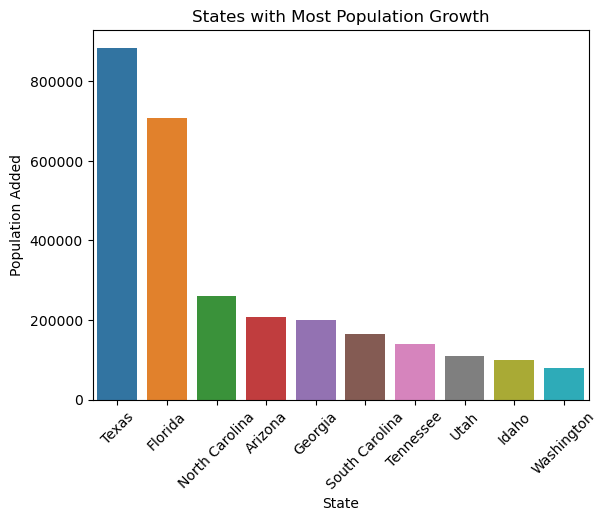

In [38]:
sns.barplot(x = 'state', y = 'change 2020-2022', data = top_10_up)
plt.title('States with Most Population Growth')
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel('State')
plt.ylabel('Population Added')

# Top states for population loss

In [39]:
top_10_down = pop_down.head(10)

Text(0, 0.5, 'Population Lost')

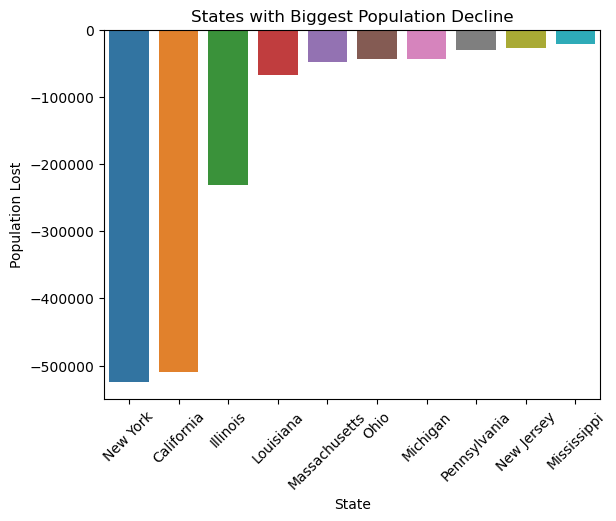

In [40]:
sns.barplot(x = 'state', y = 'change 2020-2022', data = top_10_down)
plt.title('States with Biggest Population Decline')
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel('State')
plt.ylabel('Population Lost')

# Most expensive COL index states

In [44]:
col = col.rename(columns={'2023': 'Cost of Living Index'})

In [45]:
col_top_10 = col.head(10)

In [47]:
col_top_10

,COL,state,GroceryCostsIndex,HealthCostsIndex,HousingCostsIndex,MiscCostsIndex,TransportationCostsIndex,UtilityCostsIndex
0,179.0,Hawaii,125.6,118.4,309.7,123.8,140.3,141.1
1,148.7,District of Columbia,106.9,104.7,241.8,117.7,107.9,110.2
2,148.4,Massachusetts,105.0,112.6,219.5,125.8,127.5,126.1
3,134.5,California,112.3,106.4,186.5,110.9,124.1,124.8
4,125.1,New York,103.0,104.5,173.3,109.0,106.7,102.5
5,124.4,Alaska,127.4,149.8,118.1,118.8,121.9,148.1
6,119.5,Maryland,108.5,96.2,152.2,108.5,100.2,109.2
7,115.1,Oregon,107.6,101.4,139.9,105.8,113.6,94.0
8,115.1,Washington,109.7,119.8,129.4,110.8,117.1,92.2
9,115.0,New Hampshire,102.3,120.6,109.8,120.8,113.6,130.2


Text(0, 0.5, 'Cost of Living Index')

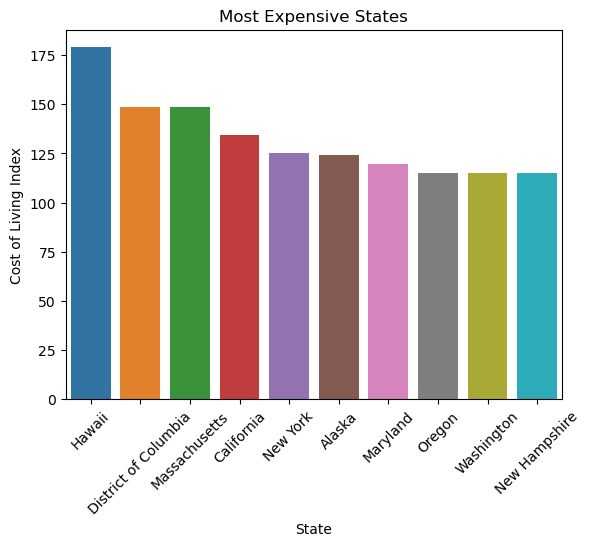

In [48]:
sns.barplot(x = 'state', y = 'COL', data = col_top_10)
plt.title('Most Expensive States')
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel('State')
plt.ylabel('Cost of Living Index')

# Least Expensive COL index states

In [50]:
col_bot_10 = col.sort_values('COL', ascending=True).head(10)

Text(0, 0.5, 'Cost of Living Index')

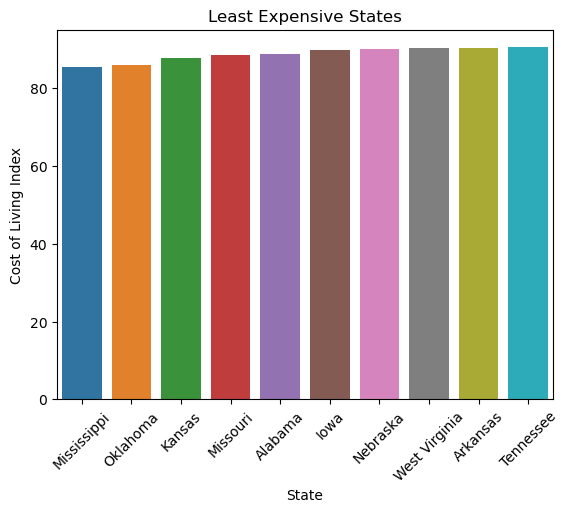

In [51]:
sns.barplot(x = 'state', y = 'COL', data = col_bot_10)
plt.title('Least Expensive States')
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel('State')
plt.ylabel('Cost of Living Index')

# States with highest median house prices

In [52]:
top_2020 = housing_2020.sort_values('median_sale_price', ascending=False).head(10)

Text(0, 0.5, 'Median House Price')

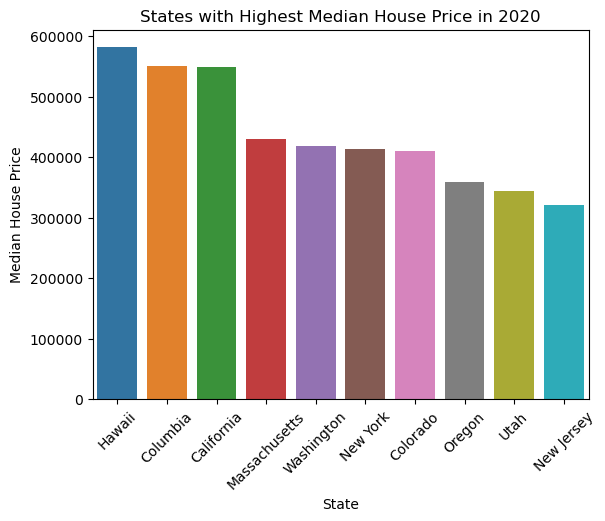

In [53]:
sns.barplot(x = 'state', y = 'median_sale_price', data = top_2020)
plt.title('States with Highest Median House Price in 2020')
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel('State')
plt.ylabel('Median House Price')

In [54]:
top_2021 = housing_2021.sort_values('median_sale_price', ascending=False).head(10)

Text(0, 0.5, 'Median House Price')

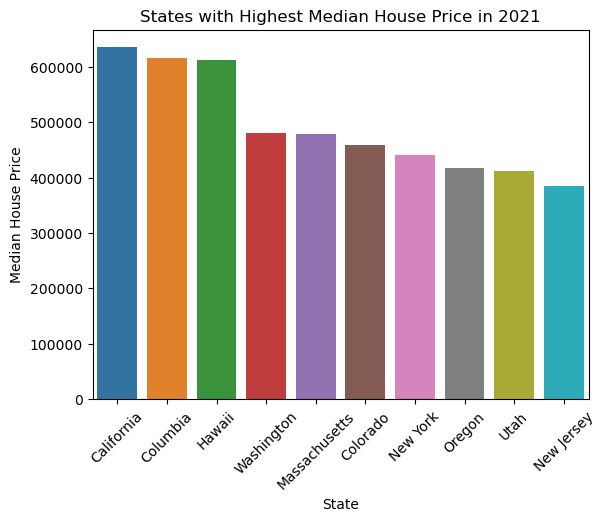

In [55]:
sns.barplot(x = 'state', y = 'median_sale_price', data = top_2021)
plt.title('States with Highest Median House Price in 2021')
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel('State')
plt.ylabel('Median House Price')

In [56]:
top_2022 = housing_2022.sort_values('median_sale_price', ascending=False).head(10)

Text(0, 0.5, 'Median House Price')

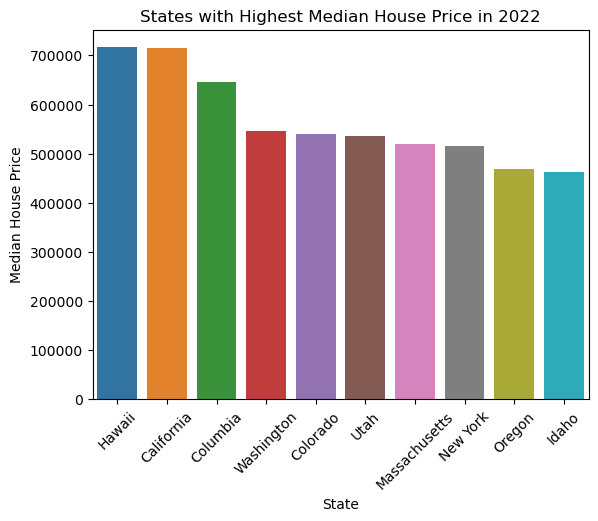

In [57]:
sns.barplot(x = 'state', y = 'median_sale_price', data = top_2022)
plt.title('States with Highest Median House Price in 2022')
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel('State')
plt.ylabel('Median House Price')

# States with the lowest median house price

In [58]:
bot_2020 = housing_2020.sort_values('median_sale_price', ascending=True).head(10)

Text(0, 0.5, 'Median House Price')

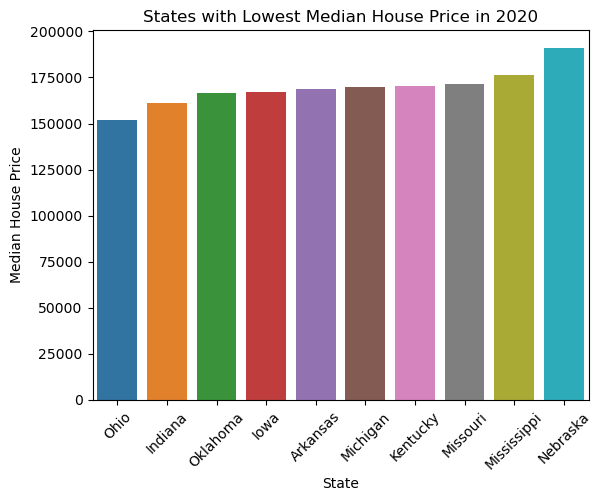

In [59]:
sns.barplot(x = 'state', y = 'median_sale_price', data = bot_2020)
plt.title('States with Lowest Median House Price in 2020')
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel('State')
plt.ylabel('Median House Price')

In [60]:
bot_2021 = housing_2021.sort_values('median_sale_price', ascending=True).head(10)

Text(0, 0.5, 'Median House Price')

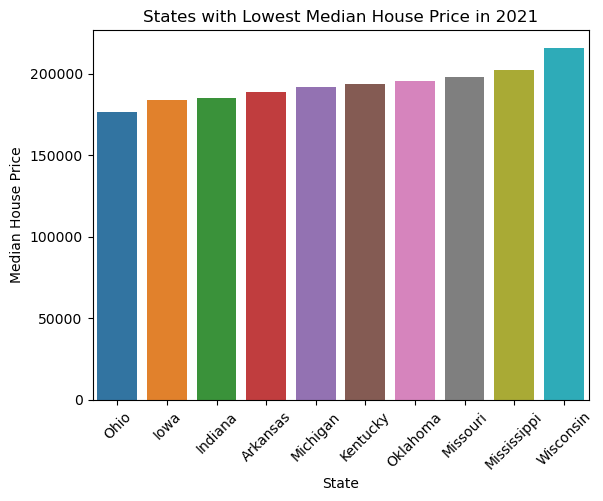

In [61]:
sns.barplot(x = 'state', y = 'median_sale_price', data = bot_2021)
plt.title('States with Lowest Median House Price in 2021')
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel('State')
plt.ylabel('Median House Price')

In [62]:
bot_2022 = housing_2022.sort_values('median_sale_price', ascending=True).head(10)

Text(0, 0.5, 'Median House Price')

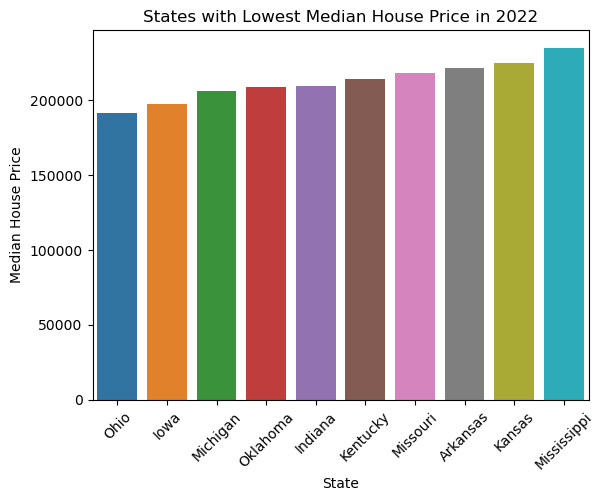

In [63]:
sns.barplot(x = 'state', y = 'median_sale_price', data = bot_2022)
plt.title('States with Lowest Median House Price in 2022')
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel('State')
plt.ylabel('Median House Price')

# Getting housing dataframes into excel for tableau

In [66]:
housing.to_excel("housing.xlsx", index=False)

In [68]:
housing.head(10)

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,year
6,2023-08-01,2023-08-31,30,state,4,12,f,New Jersey,NaN,New Jersey,NJ,All Residential,-1,514800,0.029994,0.107608,484000.0,-0.018733,0.094311,296.0,0.005449,0.088269,290.0,-0.020107,0.072759,8856,0.100534,-0.215033,7338.0,0.025720,-0.241707,8829.0,-0.011863,-0.179690,17012.0,-0.014711,-0.350960,1.9,-0.2,-0.4,31.0,0.0,-5.0,1.030037,-0.002541,0.008933,0.594512,-0.018263,0.023248,0.156654,0.017247,-0.021058,0.355297,0.013949,0.116071,Northeast Region,NaN,2023-09-24 14:28:29,2023
12,2012-04-01,2012-04-30,30,state,4,16,f,New York,NaN,New York,NY,All Residential,-1,189700,-0.013184,-0.015239,237600.0,-0.035313,0.005953,126.0,-0.026558,-0.003425,144.0,-0.017608,0.012664,4619,0.029418,0.068224,2700.0,0.290014,0.155327,11246.0,0.054280,-0.024885,54965.0,0.041339,0.078337,11.9,0.1,0.1,161.0,-1.0,19.0,0.939971,0.001930,-0.000638,0.119290,0.001839,0.009669,0.058801,-0.002033,-0.013513,0.130915,-0.007919,0.026819,Northeast Region,NaN,2023-09-24 14:28:29,2012
15,2019-10-01,2019-10-31,30,state,4,41,f,Maine,NaN,Maine,ME,All Residential,-1,225700,-0.030415,0.038329,237800.0,-0.005410,0.043639,145.0,-0.015421,0.023542,148.0,-0.007875,0.039854,2042,-0.000489,0.025100,1384.0,-0.132288,-0.074866,1818.0,-0.148478,-0.119613,7033.0,-0.070201,-0.102934,3.4,-0.3,-0.5,39.0,7.0,-4.0,0.968373,-0.000986,0.002582,0.217434,-0.014578,0.023157,0.249254,-0.018330,-0.009930,0.383391,-0.024659,0.050095,Northeast Region,NaN,2023-09-24 14:28:29,2019
16,2014-03-01,2014-03-31,30,state,4,35,f,Kansas,NaN,Kansas,KS,All Residential,-1,144100,0.035344,-0.047570,169300.0,0.017321,0.048306,78.0,0.030342,0.039748,85.0,0.006092,0.037375,1623,0.197786,-0.126480,386.0,0.072222,-0.112644,3011.0,0.495777,0.062831,5166.0,0.076699,-0.061239,3.2,-0.3,0.2,105.0,-1.0,0.0,0.967001,0.014843,0.003870,0.135638,0.026654,0.003733,NaN,NaN,NaN,0.058877,-0.015035,0.015286,Midwest Region,NaN,2023-09-24 14:28:29,2014
21,2022-12-01,2022-12-31,30,state,4,15,f,Delaware,NaN,Delaware,DE,All Residential,-1,308700,-0.038267,0.059254,309700.0,0.032669,0.096999,175.0,-0.008434,0.096166,172.0,-0.027640,0.060568,636,-0.021538,-0.420237,530.0,-0.032847,-0.226277,422.0,-0.326954,-0.346749,1019.0,-0.186102,-0.010680,1.6,-0.3,0.7,33.0,5.0,14.0,0.990849,-0.002896,-0.009601,0.300314,-0.010455,-0.086194,0.237488,-0.069222,0.053022,0.337000,-0.057162,-0.119943,South Region,NaN,2023-09-24 14:28:29,2022
23,2012-05-01,2012-05-31,30,state,4,35,f,Kansas,NaN,Kansas,KS,All Residential,-1,148900,0.029369,0.050604,148900.0,-0.064791,-0.009117,74.0,0.018026,0.038396,79.0,0.006821,0.003043,2200,0.208791,0.220866,564.0,0.320843,0.250554,2893.0,-0.049606,0.073469,5956.0,0.011549,0.032057,2.7,-0.5,-0.5,94.0,-10.0,-14.0,0.959738,-0.021587,0.003625,0.120332,0.011263,0.000379,NaN,NaN,NaN,0.034768,-0.010323,-0.018467,Midwest Region,NaN,2023-09-24 14:28:29,2012
35,2013-10-01,2013-10-31,30,state,4,35,f,Kansas,NaN,Kansas,KS,All Residential,-1,159500,0.033235,0.080288,153700.0,0.014244,0.055121,76.0,-0.026124,0.056863,80.0,-0.017030,0.064657,1958,-0.075543,0.063552,565.0,-0.034188,0.0